In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import time

In [2]:
df=pd.read_csv("F:\Work\diease detection\ckd\diease detection\chronic-1.csv")

In [3]:
df['sc'].unique()

array(['1.2', '0.8', '1.8', '3.8', '0.5', '1.4', '1.1', '1', '0.7', '7.2',
       '4', '24', '1.9', '2.7', '2.1', '4.6', '4.1', '0.9', '0.6', '5.2',
       '1.3', '9.6', '2.2', '1.6', '3.9', '76', '7.7', '?', '2.4', '1.5',
       '2.5', '7.3', '2', '3.4', '10.8', '6.3', '5.9', '3', '0.4', '3.25',
       '9.7', '32', '6.1', '6.4', '3.2', '3.3', '2.8', '6.7', '8.5', '15',
       '2.9', '1.7', '3.6', '5.6', '6.5', '4.4', '10.2', '11.5', '12.2',
       '5.3', '13.8', '9.2', '16.9', '6', '7.1', '18', '2.3', '13',
       '48.1', '14.2', '16.4', '7.5', '2.6', '4.3', '18.1', '11.8', '9.3',
       '6.8', '13.5', '12.8', '11.9', '12', '13.4', '13.3', '15.2'],
      dtype=object)

In [4]:
df=df.replace('?',np.nan)

In [5]:
data=df[['sg', 'al', 'su', 'bgr', 'sc', 'hemo', 'pcv', 'rbcc', 'rbc', 'htn',
       'dm', 'appet','Label']].copy()

In [6]:
#df1=df.drop(columns=['id','age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc'])

In [7]:
df1=data.drop(columns=['rbc','htn','dm','appet','Label'])

In [8]:
df1

,sg,al,su,bgr,sc,hemo,pcv,rbcc
0,1.02,1,0,121,1.2,15.4,44,5.2
1,1.02,4,0,NaN,0.8,11.3,38,NaN
2,1.02,0,0,92,1.2,14.9,48,5.4
3,1.01,2,3,423,1.8,9.6,31,NaN
4,1.005,4,0,117,3.8,11.2,32,3.9
...,...,...,...,...,...,...,...,...
395,1.02,0,0,91,0.7,14,46,5.8
396,1.015,3,2,463,2.8,12.2,40,4.6
397,NaN,NaN,NaN,103,5.3,6.3,19,2.6
398,1.015,3,0,106,15.2,8.6,26,2.5


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [10]:
lr=LinearRegression()
imp=IterativeImputer(estimator=lr,verbose=2,max_iter=100, tol=1e-10, imputation_order='roman')

In [11]:
df2=imp.fit_transform(df1)

[IterativeImputer] Completing matrix with shape (400, 8)
[IterativeImputer] Ending imputation round 1/100, elapsed time 0.02
[IterativeImputer] Change: 182.27250463282877, scaled tolerance: 4.9e-08 
[IterativeImputer] Ending imputation round 2/100, elapsed time 0.02
[IterativeImputer] Change: 18.887880713988565, scaled tolerance: 4.9e-08 
[IterativeImputer] Ending imputation round 3/100, elapsed time 0.03
[IterativeImputer] Change: 15.664749386650762, scaled tolerance: 4.9e-08 
[IterativeImputer] Ending imputation round 4/100, elapsed time 0.03
[IterativeImputer] Change: 12.960883525117847, scaled tolerance: 4.9e-08 
[IterativeImputer] Ending imputation round 5/100, elapsed time 0.05
[IterativeImputer] Change: 10.635872032214749, scaled tolerance: 4.9e-08 
[IterativeImputer] Ending imputation round 6/100, elapsed time 0.05
[IterativeImputer] Change: 8.778279890974257, scaled tolerance: 4.9e-08 
[IterativeImputer] Ending imputation round 7/100, elapsed time 0.07
[IterativeImputer] Chang

[IterativeImputer] Change: 0.00057590354672854, scaled tolerance: 4.9e-08 
[IterativeImputer] Ending imputation round 68/100, elapsed time 0.56
[IterativeImputer] Change: 0.0004932680458558103, scaled tolerance: 4.9e-08 
[IterativeImputer] Ending imputation round 69/100, elapsed time 0.57
[IterativeImputer] Change: 0.00042249037619845886, scaled tolerance: 4.9e-08 
[IterativeImputer] Ending imputation round 70/100, elapsed time 0.58
[IterativeImputer] Change: 0.000361868842745805, scaled tolerance: 4.9e-08 
[IterativeImputer] Ending imputation round 71/100, elapsed time 0.60
[IterativeImputer] Change: 0.00030994600147193907, scaled tolerance: 4.9e-08 
[IterativeImputer] Ending imputation round 72/100, elapsed time 0.60
[IterativeImputer] Change: 0.00026547357156836426, scaled tolerance: 4.9e-08 
[IterativeImputer] Ending imputation round 73/100, elapsed time 0.61
[IterativeImputer] Change: 0.00022738243967013183, scaled tolerance: 4.9e-08 
[IterativeImputer] Ending imputation round 74/

C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [12]:
dl1=pd.DataFrame(df2,columns=('sg','al','su','bgr','sc','hemo','pcv','rbcc'))

In [13]:
dl1.head(20)

,sg,al,su,bgr,sc,hemo,pcv,rbcc
0,1.020,1.0,0.0,121.000000,1.2,15.4,44.0,5.200000
1,1.020,4.0,0.0,155.893755,0.8,11.3,38.0,4.483714
2,1.020,0.0,0.0,92.000000,1.2,14.9,48.0,5.400000
3,1.010,2.0,3.0,423.000000,1.8,9.6,31.0,3.742738
4,1.005,4.0,0.0,117.000000,3.8,11.2,32.0,3.900000
5,1.020,0.0,0.0,89.000000,0.5,16.7,52.0,5.000000
6,1.010,2.0,0.0,106.000000,1.4,11.6,35.0,4.600000
7,1.015,3.0,0.0,74.000000,1.1,12.2,39.0,4.400000
8,1.025,0.0,0.0,124.000000,1.0,14.9,41.0,5.700000
9,1.020,0.0,0.0,110.000000,0.7,14.3,40.0,5.800000


In [14]:
df3=data.drop(columns=['sg','al','su','bgr','sc','hemo','pcv','rbcc','Label'])

In [15]:
df3

,rbc,htn,dm,appet
0,NaN,yes,yes,good
1,NaN,no,no,good
2,normal,no,no,good
3,normal,no,yes,poor
4,normal,yes,no,poor
...,...,...,...,...
395,normal,no,no,good
396,NaN,yes,yes,good
397,NaN,yes,no,poor
398,abnormal,yes,no,good


In [16]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='constant',fill_value='Missing')
df4=imputer.fit_transform(df3)

In [17]:
dl2=pd.DataFrame(df4,columns=('rbc','htn','dm','appet'))

In [18]:
dl2.head()

,rbc,htn,dm,appet
0,Missing,yes,yes,good
1,Missing,no,no,good
2,normal,no,no,good
3,normal,no,yes,poor
4,normal,yes,no,poor


In [19]:
from sklearn.preprocessing import OrdinalEncoder
ordi=OrdinalEncoder()

In [20]:
dl3=ordi.fit_transform(dl2)

In [21]:
dl4=pd.DataFrame(dl3,columns=('rbc','htn','dm','appet'))

In [22]:
dl4

,rbc,htn,dm,appet
0,0.0,2.0,2.0,1.0
1,0.0,1.0,1.0,1.0
2,2.0,1.0,1.0,1.0
3,2.0,1.0,2.0,3.0
4,2.0,2.0,1.0,3.0
...,...,...,...,...
395,2.0,1.0,1.0,1.0
396,0.0,2.0,2.0,1.0
397,0.0,2.0,1.0,3.0
398,1.0,2.0,1.0,1.0


In [23]:
x=pd.concat([dl1,dl4],axis=1)

In [24]:
x

,sg,al,su,bgr,sc,hemo,pcv,rbcc,rbc,htn,dm,appet
0,1.020000,1.000000,0.000000,121.000000,1.2,15.40000,44.000000,5.200000,0.0,2.0,2.0,1.0
1,1.020000,4.000000,0.000000,155.893755,0.8,11.30000,38.000000,4.483714,0.0,1.0,1.0,1.0
2,1.020000,0.000000,0.000000,92.000000,1.2,14.90000,48.000000,5.400000,2.0,1.0,1.0,1.0
3,1.010000,2.000000,3.000000,423.000000,1.8,9.60000,31.000000,3.742738,2.0,1.0,2.0,3.0
4,1.005000,4.000000,0.000000,117.000000,3.8,11.20000,32.000000,3.900000,2.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.020000,0.000000,0.000000,91.000000,0.7,14.00000,46.000000,5.800000,2.0,1.0,1.0,1.0
396,1.015000,3.000000,2.000000,463.000000,2.8,12.20000,40.000000,4.600000,0.0,2.0,2.0,1.0
397,1.010512,2.699747,-0.255426,103.000000,5.3,6.30000,19.000000,2.600000,0.0,2.0,1.0,3.0
398,1.015000,3.000000,0.000000,106.000000,15.2,8.60000,26.000000,2.500000,1.0,2.0,1.0,1.0


In [25]:
y=df['Label']

In [26]:
a=pd.concat([x,y],axis=1)

In [27]:
a

,sg,al,su,bgr,sc,hemo,pcv,rbcc,rbc,htn,dm,appet,Label
0,1.020000,1.000000,0.000000,121.000000,1.2,15.40000,44.000000,5.200000,0.0,2.0,2.0,1.0,ckd
1,1.020000,4.000000,0.000000,155.893755,0.8,11.30000,38.000000,4.483714,0.0,1.0,1.0,1.0,ckd
2,1.020000,0.000000,0.000000,92.000000,1.2,14.90000,48.000000,5.400000,2.0,1.0,1.0,1.0,notckd
3,1.010000,2.000000,3.000000,423.000000,1.8,9.60000,31.000000,3.742738,2.0,1.0,2.0,3.0,ckd
4,1.005000,4.000000,0.000000,117.000000,3.8,11.20000,32.000000,3.900000,2.0,2.0,1.0,3.0,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.020000,0.000000,0.000000,91.000000,0.7,14.00000,46.000000,5.800000,2.0,1.0,1.0,1.0,notckd
396,1.015000,3.000000,2.000000,463.000000,2.8,12.20000,40.000000,4.600000,0.0,2.0,2.0,1.0,ckd
397,1.010512,2.699747,-0.255426,103.000000,5.3,6.30000,19.000000,2.600000,0.0,2.0,1.0,3.0,ckd
398,1.015000,3.000000,0.000000,106.000000,15.2,8.60000,26.000000,2.500000,1.0,2.0,1.0,1.0,ckd


In [28]:
#a=a.sort_values(['bu'],ascending=False)
#a.reset_index(drop=True,inplace=True)

In [29]:
#a.tail(40)

In [30]:
Label={'notckd':0,'ckd':1}
a['Label']=a['Label'].map(Label)

In [31]:
a.head(20)

,sg,al,su,bgr,sc,hemo,pcv,rbcc,rbc,htn,dm,appet,Label
0,1.020,1.0,0.0,121.000000,1.2,15.4,44.0,5.200000,0.0,2.0,2.0,1.0,1
1,1.020,4.0,0.0,155.893755,0.8,11.3,38.0,4.483714,0.0,1.0,1.0,1.0,1
2,1.020,0.0,0.0,92.000000,1.2,14.9,48.0,5.400000,2.0,1.0,1.0,1.0,0
3,1.010,2.0,3.0,423.000000,1.8,9.6,31.0,3.742738,2.0,1.0,2.0,3.0,1
4,1.005,4.0,0.0,117.000000,3.8,11.2,32.0,3.900000,2.0,2.0,1.0,3.0,1
5,1.020,0.0,0.0,89.000000,0.5,16.7,52.0,5.000000,2.0,1.0,1.0,1.0,0
6,1.010,2.0,0.0,106.000000,1.4,11.6,35.0,4.600000,2.0,1.0,1.0,1.0,1
7,1.015,3.0,0.0,74.000000,1.1,12.2,39.0,4.400000,0.0,2.0,2.0,1.0,1
8,1.025,0.0,0.0,124.000000,1.0,14.9,41.0,5.700000,2.0,1.0,1.0,1.0,0
9,1.020,0.0,0.0,110.000000,0.7,14.3,40.0,5.800000,2.0,1.0,1.0,0.0,0


In [32]:
u=a.iloc[:,:-1]
v=a['Label']

In [33]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE 

In [34]:
smote=SMOTE()
sm = SVMSMOTE()

In [35]:
x_train_resample,y_train_resample=sm.fit_resample(u,v) 

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
k=scaler.fit_transform(x_train_resample)

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(k,y_train_resample,test_size=0.2, random_state=0)

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
fold=ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
fold1=KFold(5)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

In [39]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

In [40]:
svm=SVC(C=10,kernel='rbf',gamma=0.01,probability=True)
knn=KNeighborsClassifier(n_neighbors=7)
rf=RandomForestClassifier(n_estimators=70,max_features='auto',bootstrap=True,
                          min_samples_split=8,min_samples_leaf=3,max_depth=None,random_state=0)
qda = QuadraticDiscriminantAnalysis()
tree=DecisionTreeClassifier(criterion='entropy',min_samples_split=6,random_state=0,max_depth=None)
tree1=DecisionTreeClassifier(criterion='entropy',min_samples_split=6,random_state=0,max_depth=8)
estimators1=[('svc',svm),('knn',knn)]
sc=StackingClassifier(estimators=estimators1,final_estimator=rf)
estimators=[('svc',svm),('knn',knn),('rf',rf)]

voting=VotingClassifier(estimators=estimators,voting='soft')
bag=BaggingClassifier(
    base_estimator=tree,
    n_estimators=500,
    bootstrap=True,
    bootstrap_features=False,
    n_jobs=-1,
    random_state=0
    )
ada= AdaBoostClassifier(
      base_estimator=tree1,n_estimators=500,algorithm='SAMME', 
      random_state=0
      )
gdb=GradientBoostingClassifier(n_estimators=500,max_depth=6,learning_rate=0.05,min_samples_leaf=10)
lgb=LGBMClassifier(n_estimators=300,max_depth=3,learning_rate=0.05,min_child_weight=5)
xgb=XGBClassifier(n_estimators=700,max_depth=4,learning_rate=0.25,min_child_weight=8)

In [41]:
labels=['svm','knn','tree','rf','qda','voting','bag','ada','gdb','xgb','lgb','sc']

In [42]:
for clf,label in zip([svm,knn,tree,rf,qda,voting,bag,ada,gdb,xgb,lgb,sc],labels):
    training_start = time.perf_counter()
    results_svm=cross_val_score(clf,x_train,y_train,cv=fold,scoring='accuracy')
    training_end = time.perf_counter()
    train_time = training_end-training_start
    print("Time consumed for training: %4.3f seconds" % (train_time))
    print("%0.4faccuracy with a standard deviation of %0.4f" % (results_svm.mean(), results_svm.std()),label)

Time consumed for training: 0.035 seconds
1.0000accuracy with a standard deviation of 0.0000 svm
Time consumed for training: 0.024 seconds
1.0000accuracy with a standard deviation of 0.0000 knn
Time consumed for training: 0.014 seconds
0.9850accuracy with a standard deviation of 0.0200 tree
Time consumed for training: 0.609 seconds
1.0000accuracy with a standard deviation of 0.0000 rf
Time consumed for training: 0.010 seconds
0.9850accuracy with a standard deviation of 0.0122 qda
Time consumed for training: 0.628 seconds
1.0000accuracy with a standard deviation of 0.0000 voting
Time consumed for training: 4.012 seconds
0.9950accuracy with a standard deviation of 0.0100 bag
Time consumed for training: 0.029 seconds
0.9850accuracy with a standard deviation of 0.0200 ada
Time consumed for training: 3.782 seconds
0.9900accuracy with a standard deviation of 0.0200 gdb
[23:51:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.

C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: Use

[23:51:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:51:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Time consumed for training: 0.707 seconds
0.9950accuracy with a standard deviation of 0.0100 xgb
Time consumed for training: 0.116 seconds
1.0000accuracy with a standard deviation of 0.0000 lgb
Time consumed for training: 0.725 seconds
1.0000accuracy with a standard deviation of 0.0000 sc


In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score 

In [44]:
for clf,label in zip([svm,knn,tree,rf,qda,voting,bag,ada,gdb,xgb,lgb,sc],labels):
    training_start = time.perf_counter()
    clf.fit(x_train,y_train)
    training_end = time.perf_counter()
    train_time = training_end-training_start
    print("Time consumed for training: %4.3f seconds" % (train_time))
    y_pred=clf.predict(x_test)
    print(accuracy_score(y_test,y_pred),label)
    print(confusion_matrix(y_test,y_pred))
    print(precision_score(y_test,y_pred))
    print(recall_score(y_test,y_pred))
    print(f1_score(y_test,y_pred))
    print(roc_auc_score(y_test,y_pred))
        

Time consumed for training: 0.006 seconds
1.0 svm
[[45  0]
 [ 0 55]]
1.0
1.0
1.0
1.0
Time consumed for training: 0.001 seconds
1.0 knn
[[45  0]
 [ 0 55]]
1.0
1.0
1.0
1.0
Time consumed for training: 0.001 seconds
0.99 tree
[[45  0]
 [ 1 54]]
1.0
0.9818181818181818
0.9908256880733944
0.990909090909091
Time consumed for training: 0.101 seconds
1.0 rf
[[45  0]
 [ 0 55]]
1.0
1.0
1.0
1.0
Time consumed for training: 0.001 seconds
0.98 qda
[[43  2]
 [ 0 55]]
0.9649122807017544
1.0
0.9821428571428572
0.9777777777777779
Time consumed for training: 0.102 seconds
1.0 voting
[[45  0]
 [ 0 55]]
1.0
1.0
1.0
1.0
Time consumed for training: 0.371 seconds
0.99 bag
[[45  0]
 [ 1 54]]
1.0
0.9818181818181818
0.9908256880733944
0.990909090909091
Time consumed for training: 0.006 seconds
0.99 ada
[[45  0]
 [ 1 54]]
1.0
0.9818181818181818
0.9908256880733944
0.990909090909091
Time consumed for training: 0.815 seconds
1.0 gdb
[[45  0]
 [ 0 55]]
1.0
1.0
1.0
1.0
[23:51:04] WARNING: C:/Users/Administrator/workspac

C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


1.0 lgb
[[45  0]
 [ 0 55]]
1.0
1.0
1.0
1.0
Time consumed for training: 0.140 seconds
1.0 sc
[[45  0]
 [ 0 55]]
1.0
1.0
1.0
1.0


In [45]:
from mlxtend.evaluate import combined_ftest_5x2cv

In [46]:
f, p = combined_ftest_5x2cv(estimator1=xgb,
                            estimator2=lgb,
                            X=k, y=y_train_resample,
                            random_seed=1)

C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:51:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:51:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:51:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:51:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:51:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [47]:
print('F statistic: %.3f' % f)
print('p value: %.3f' % p)

F statistic: 1.022
p value: 0.524


# fig, ax=plt.subplots(4,2,figsize=(20,20))
train_sizes,train_scores,test_scores=learning_curve(rf, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

train_sizes,train_scores,test_scores=learning_curve(voting, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

train_sizes,train_scores,test_scores=learning_curve(bag, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

train_sizes,train_scores,test_scores=learning_curve(ada, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

train_sizes,train_scores,test_scores=learning_curve(gdb, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

train_sizes,train_scores,test_scores=learning_curve(lgb, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

train_sizes,train_scores,test_scores=learning_curve(xgb, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

train_sizes,train_scores,test_scores=learning_curve(sc, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

ax[0,0].plot(train_sizes, train_mean, label ='Training Score')
ax[0,0].plot(train_sizes, test_mean, label ='Cross-Validation Score')
ax[0,0].title.set_text('Learning curve for Random Forest')
ax[0,0].set_xlabel('training size')
ax[0,0].legend(loc='best')

ax[0,1].plot(train_sizes, train_mean, label ='Training Score')
ax[0,1].plot(train_sizes, test_mean, label ='Cross-Validation Score')
ax[0,1].title.set_text('Learning curve for Voting')
ax[0,1].set_xlabel('training size')
ax[0,1].legend(loc='best')

ax[1,0].plot(train_sizes, train_mean, label ='Training Score')
ax[1,0].plot(train_sizes, test_mean, label ='Cross-Validation Score')
ax[1,0].title.set_text('Learning curve for Aadptive Boosting')
ax[1,0].set_xlabel('training size')
ax[1,0].legend(loc='best')

ax[1,1].plot(train_sizes, train_mean, label ='Training Score')
ax[1,1].plot(train_sizes, test_mean, label ='Cross-Validation Score')
ax[1,1].title.set_text('Learning curve for Gradient Boosting')
ax[1,1].set_xlabel('training size')
ax[1,1].legend(loc='best')

ax[2,0].plot(train_sizes, train_mean, label ='Training Score')
ax[2,0].plot(train_sizes, test_mean, label ='Cross-Validation Score')
ax[2,0].title.set_text('Learning curve for Light Gradient Boosting')
ax[2,0].set_xlabel('training size')
ax[2,0].legend(loc='best')

ax[2,1].plot(train_sizes, train_mean, label ='Training Score')
ax[2,1].plot(train_sizes, test_mean, label ='Cross-Validation Score')
ax[2,1].title.set_text('Learning curve for Xtreme Gradient Boosting')
ax[2,1].set_xlabel('training size')
ax[2,1].legend(loc='best')

ax[3,0].plot(train_sizes, train_mean, label ='Training Score')
ax[3,0].plot(train_sizes, test_mean, label ='Cross-Validation Score')
ax[3,0].title.set_text('Learning curve for Xtreme Gradient Boosting')
ax[3,0].set_xlabel('training size')
ax[3,0].legend(loc='best')

ax[3,1].plot(train_sizes, train_mean, label ='Training Score')
ax[3,1].plot(train_sizes, test_mean, label ='Cross-Validation Score')
ax[3,1].title.set_text('Learning curve for Stacking')
ax[3,1].set_xlabel('training size')
ax[3,1].legend(loc='best')

plt.tight_layout
plt.show()

fig.savefig('fig1.png')

# Random Forest

[learning_curve] Training set sizes: [  4  13  22  31  40  49  59  68  77  86  95 104 113 122 131 140 149 159
 168 177 186 195 204 213 222 231 240 249 259 268 277 286 295 304 313 322
 331 340 349 359 368 377 386 395 404 413 422 431 440 450]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    9.9s finished


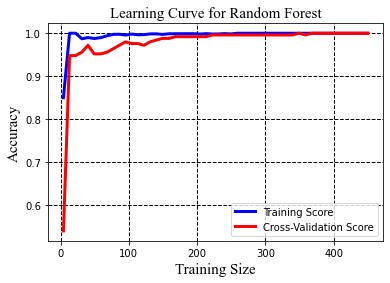

In [48]:
train_sizes,train_scores,test_scores=learning_curve(rf, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning Curve for Random Forest', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.savefig("random.jpg",dpi=300)
plt.show()

# Voting

[learning_curve] Training set sizes: [  4  13  22  31  40  49  59  68  77  86  95 104 113 122 131 140 149 159
 168 177 186 195 204 213 222 231 240 249 259 268 277 286 295 304 313 322
 331 340 349 359 368 377 386 395 404 413 422 431 440 450]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    9.6s finished


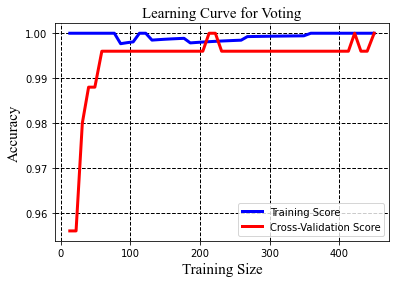

In [49]:
train_sizes,train_scores,test_scores=learning_curve(voting, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning Curve for Voting', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.savefig("voting.jpg",dpi=300)
plt.show()

# Bagging

[learning_curve] Training set sizes: [  4  13  22  31  40  49  59  68  77  86  95 104 113 122 131 140 149 159
 168 177 186 195 204 213 222 231 240 249 259 268 277 286 295 304 313 322
 331 340 349 359 368 377 386 395 404 413 422 431 440 450]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.2min finished


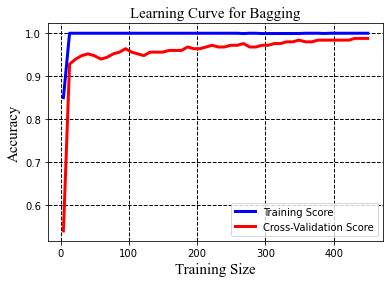

In [50]:
train_sizes,train_scores,test_scores=learning_curve(bag, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning Curve for Bagging', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.savefig('bagging.jpg',dpi=300)
plt.show()

# Adaptive

[learning_curve] Training set sizes: [  4  13  22  31  40  49  59  68  77  86  95 104 113 122 131 140 149 159
 168 177 186 195 204 213 222 231 240 249 259 268 277 286 295 304 313 322
 331 340 349 359 368 377 386 395 404 413 422 431 440 450]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.6s finished


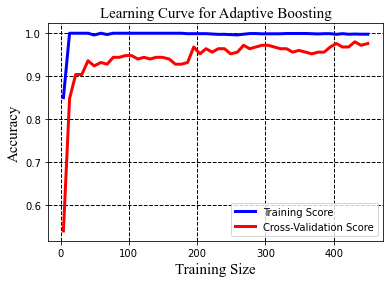

In [51]:
train_sizes,train_scores,test_scores=learning_curve(ada, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning Curve for Adaptive Boosting', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.tight_layout
plt.savefig('adaptive.jpg',dpi=300)
plt.show()

# Gradient

[learning_curve] Training set sizes: [  4  13  22  31  40  49  59  68  77  86  95 104 113 122 131 140 149 159
 168 177 186 195 204 213 222 231 240 249 259 268 277 286 295 304 313 322
 331 340 349 359 368 377 386 395 404 413 422 431 440 450]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   34.8s finished


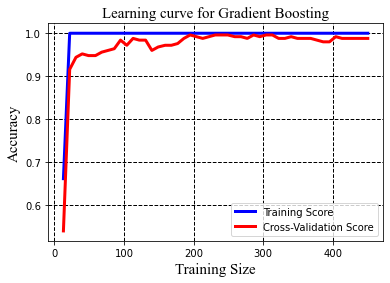

In [52]:
train_sizes,train_scores,test_scores=learning_curve(gdb, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning curve for Gradient Boosting', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.tight_layout

plt.savefig('gradient.jpg',dpi=300)
plt.show()

# LGB

[learning_curve] Training set sizes: [  4  13  22  31  40  49  59  68  77  86  95 104 113 122 131 140 149 159
 168 177 186 195 204 213 222 231 240 249 259 268 277 286 295 304 313 322
 331 340 349 359 368 377 386 395 404 413 422 431 440 450]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    2.7s finished


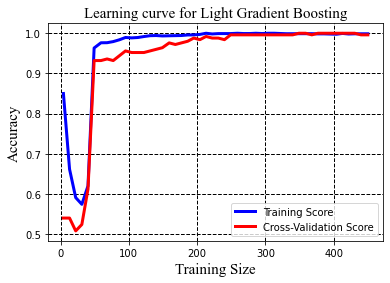

In [53]:
train_sizes,train_scores,test_scores=learning_curve(lgb, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning curve for Light Gradient Boosting', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.tight_layout

plt.savefig('Light.jpg',dpi=300)
plt.show()

# Xtreme

[learning_curve] Training set sizes: [  4  13  22  31  40  49  59  68  77  86  95 104 113 122 131 140 149 159
 168 177 186 195 204 213 222 231 240 249 259 268 277 286 295 304 313 322
 331 340 349 359 368 377 386 395 404 413 422 431 440 450]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   17.3s finished


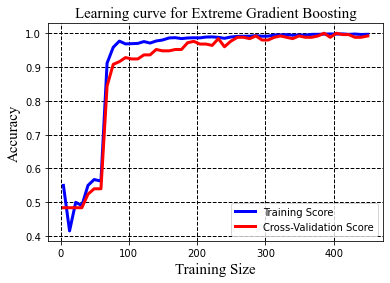

In [54]:
train_sizes,train_scores,test_scores=learning_curve(xgb, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning curve for Extreme Gradient Boosting', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.tight_layout

plt.savefig('Xtreme.jpg',dpi=300)
plt.show()

# Stacking

[learning_curve] Training set sizes: [  4  13  22  31  40  49  59  68  77  86  95 104 113 122 131 140 149 159
 168 177 186 195 204 213 222 231 240 249 259 268 277 286 295 304 313 322
 331 340 349 359 368 377 386 395 404 413 422 431 440 450]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   10.3s finished


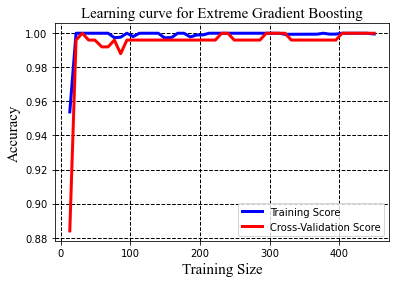

In [55]:
train_sizes,train_scores,test_scores=learning_curve(sc, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning curve for Extreme Gradient Boosting', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.tight_layout
plt.savefig('Stacking.jpg',dpi=300)
plt.show()